<a href="https://colab.research.google.com/github/Dr-Carlos-Villasenor/TRSeminar/blob/main/TRS09A_Practice_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Seminar
## Dr. Carlos Vilaseñor
## Practice classification

Import basic modules

In [ ]:
import pandas as pd
import numpy as np

Run just one of the following datasets

# Cancer

In [8]:
!wget 'https://raw.githubusercontent.com/Dr-Carlos-Villasenor/TRSeminar/main/Datasets/cancer.csv'
df = pd.read_csv('cancer.csv')

--2024-05-07 16:43:32--  https://raw.githubusercontent.com/Dr-Carlos-Villasenor/TRSeminar/main/Datasets/cancer.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14249 (14K) [text/plain]
Saving to: ‘cancer.csv’

cancer.csv          100%[===================>]  13.92K  --.-KB/s    in 0.001s  

2024-05-07 16:43:32 (23.0 MB/s) - ‘cancer.csv’ saved [14249/14249]



In [9]:
# Importar paquetes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Select variables
x = np.asanyarray(df.drop(columns=['Class']))
y = np.asanyarray(df[['Class']]).ravel()

# Train/test split
xtrain, xtest, ytrain, ytest = train_test_split(x,y)

# Import some modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create and train model
model = Pipeline([
    ('scaler', StandardScaler()),
    ('logit', LogisticRegression(solver='lbfgs')) ])

model.fit(xtrain,ytrain)

# Calculate scores
print('Train: ', model.score(xtrain,ytrain))
print('Test: ', model.score(xtest,ytest))

Train:  0.970703125
Test:  0.9766081871345029


# Stars

In [ ]:
!wget 'https://raw.githubusercontent.com/Dr-Carlos-Villasenor/TRSeminar/main/Datasets/Stars.csv'
df = pd.read_csv('Stars.csv')

--2024-05-07 16:40:14--  https://raw.githubusercontent.com/Dr-Carlos-Villasenor/TRSeminar/main/Datasets/Stars.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11301 (11K) [text/plain]
Saving to: ‘Stars.csv.1’

Stars.csv.1         100%[===================>]  11.04K  --.-KB/s    in 0s      

2024-05-07 16:40:14 (73.8 MB/s) - ‘Stars.csv.1’ saved [11301/11301]



SVC
Train:  0.9464285714285714
Test:  0.875


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP
Train:  0.9404761904761905
Test:  0.9027777777777778


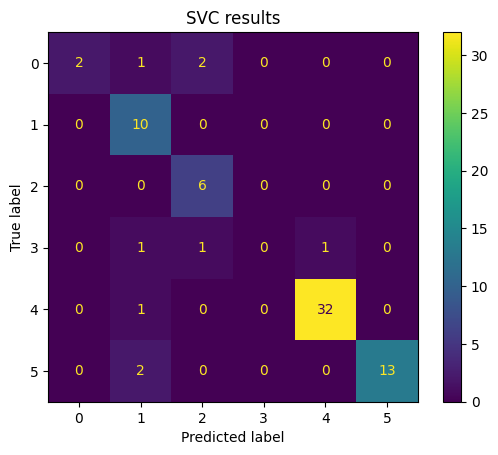

Reporte de clasificación:

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.67      1.00      0.80        10
           2       0.67      1.00      0.80         6
           4       0.00      0.00      0.00         3
           5       0.97      0.97      0.97        33
           6       1.00      0.87      0.93        15

    accuracy                           0.88        72
   macro avg       0.72      0.71      0.68        72
weighted avg       0.87      0.88      0.86        72



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# Read data
data = pd.read_csv('Stars.csv')

# Codify
le = LabelEncoder()
data[['Spectral Class']] = le.fit_transform(np.array(data[['Spectral Class']]).ravel()).reshape(-1,1)
labels = le.classes_
le = LabelEncoder()
data[['Star color']] = le.fit_transform(np.array(data[['Star color']]).ravel()).reshape(-1,1)


# Variable selection
x = np.asanyarray(data.drop(columns=['Star category', 'Spectral Class']))
y = np.asanyarray(data[['Spectral Class']])
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3)

# Create model
model1 = Pipeline([('scaler', StandardScaler()),
                  ('SVM', SVC(gamma=1))])

model2 = Pipeline([('scaler', StandardScaler()),
                  ('mlp', MLPClassifier(hidden_layer_sizes=(100,),
                                        max_iter=500))])

# Train and test
model1.fit(xtrain, ytrain.ravel())
print('SVC')
print('Train: ', model1.score(xtrain, ytrain.ravel()))
print('Test: ', model1.score(xtest, ytest.ravel()))

model2.fit(xtrain, ytrain.ravel())
print('MLP')
print('Train: ', model2.score(xtrain, ytrain.ravel()))
print('Test: ', model2.score(xtest, ytest.ravel()))

# Performance metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix, class report
ypred = model1.predict(xtest)
cm = confusion_matrix(ytest, ypred.ravel())
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('SVC results')
plt.show()

print('Reporte de clasificación:\n')
print(classification_report(ytest.ravel(), ypred))


# Insurance

In [ ]:
!wget 'https://raw.githubusercontent.com/Dr-Carlos-Villasenor/TRSeminar/main/Datasets/insurance.csv'
df = pd.read_csv('insurance.csv')

--2024-05-07 16:41:00--  https://raw.githubusercontent.com/Dr-Carlos-Villasenor/TRSeminar/main/Datasets/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  54.32K  --.-KB/s    in 0.007s  

2024-05-07 16:41:01 (7.72 MB/s) - ‘insurance.csv’ saved [55628/55628]



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Read data
data = pd.read_csv('insurance.csv')

# Coding
data.replace({'no':0,'yes':1, 'male':0, 'female':1},
             inplace=True)
region_oh = pd.get_dummies(data.region)
data = data.drop('region', axis = 1)
data = data.join(region_oh)

# Select variables
x = np.asanyarray(data.drop('charges', axis=1))
y = np.asanyarray(data[['charges']])
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.15)

# Create model
model = Pipeline([('scaler', StandardScaler()),
                  ('mlp', MLPRegressor(hidden_layer_sizes=(100,50,10),
                                       max_iter=2000))])

model.fit(xtrain, ytrain.ravel())
print('MLP')
print('Train: ', model.score(xtrain, ytrain.ravel()))
print('Test: ', model.score(xtest, ytest.ravel()))

MLP
Train:  0.8861175179135065
Test:  0.8056935179604231


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
